In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Logistic_Iris.csv")

In [3]:
x = dataset.iloc[:, [0,1,2,3]].values

In [4]:
y = dataset.iloc[:, 4].values

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [7]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2)
adaboost.fit(xtrain, ytrain)

AdaBoostClassifier(learning_rate=0.2)

In [8]:
adaboost.score(xtest, ytest)

0.8947368421052632

In [9]:
y_pred = adaboost.predict(xtest)

In [10]:
Acc_adaboost= accuracy_score(ytest,y_pred)*100
print ("Test Accuracy using AdaBoost Classifier: ", Acc_adaboost)

Test Accuracy using AdaBoost Classifier:  89.47368421052632


In [11]:
cm = confusion_matrix(ytest, y_pred)
print ("\n\n Confusion Matrix for AdaBoost Classifier: \n", cm)



 Confusion Matrix for AdaBoost Classifier: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


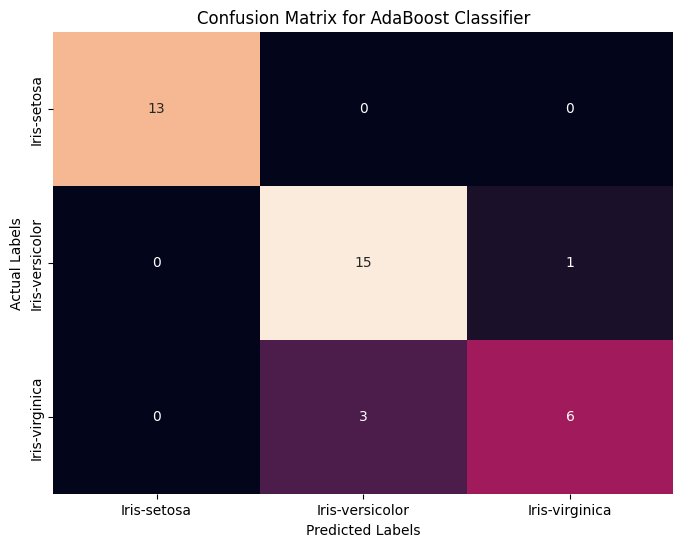

In [12]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",cbar=False,xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()